# Задча № 3 курсового проекта

Вариант № 7 (начально-краевая задача для волнового уравнения с ГУ первого рода):
\begin{equation*}
 \begin{cases}
   \frac{\partial^2 u}{\partial x^2}+\frac{\partial^2 u}{\partial y^2} = -2u,
   \\
   u(0,y)=\cos{y},
   \\
   u(\frac{\pi}{2},y) = 0,
   \\
   u(x,0)=\cos{x}
   \\
   u(x,\frac{\pi}{2})=0.
 \end{cases}
\end{equation*}

Импорт необходимых библиотек

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

Аналитическое решение:
\begin{equation*}
    U(x,y)=\cos x\cos y
\end{equation*}

In [2]:
L = math.pi / 2
n = 10
k = 100
dl = (L)/(n-1)
AU = -2

Задание функции, задающей аналитическое решение

In [3]:
def analit(L,n):
    dl = (L)/(n-1)
    x = np.arange(0,L+L/(n+1),dl)
    y = np.arange(0,L+L/(n+1),dl)
    x,y = np.meshgrid(x,y)
    u = np.cos(x)*np.cos(y)
    return x,y,u

Построение аналитического решения

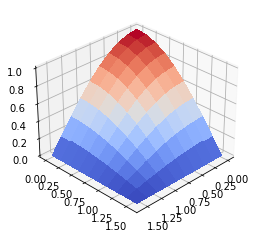

In [4]:
x, y, z = analit(L,n)
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.view_init(30,45)
plt.draw()

Конечно разностная апроксимация:
\begin{equation*}
 \begin{cases}
   \frac{u_{i-1,j}-2u_{i,j}+u_{i+1,j}}{h_x^2}+\frac{u_{i,j-1}-2u_{i,j}+u_{i,j+1}}{h_y^2} + O(h_x^2,h_y^2) = -2u_{i,j},
   \\
   u_{0,j}=\cos{j*h_y},
   \\
   u_{N_x,j} = 0,
   \\
   u_{i,0}=\cos{i*h_x}
   \\
   u_{i,N_y} = 0,
 \end{cases}
\end{equation*}

In [5]:
# просто гененрирую сетку только с граничными условиями
def generate(L, n):
    h = (L)/(n-1)
    x = np.arange(0,L+L/(n+1),h)
    y = np.arange(0,L+L/(n+1),h)
    u = np.zeros((n,n))
    for i in range(n):
        u[i,0] = np.cos(x[i])
    for j in range(n):
        u[0,j] = np.cos(y[j])
    return u

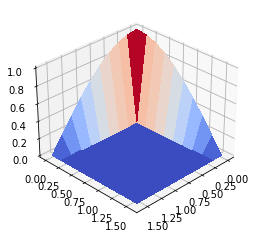

In [6]:
# вывод сетки с только с ГУ
e = generate(L,n)
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(x, y, e, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.view_init(30,45)
plt.draw()

<b>Разностно итерационный метод Либмана.</b> Значение в точке для каждой новой итерации будем находить из предыдущей предыдущего слоя как:
\begin{equation*}
   u_{i,j}^{k+1} = \frac{h_x^2h_y^2}{2*(h_x^2+h_y^2)}\left(\frac{u_{i-1,j}^k+u_{i+1,j}^k}{h_x^2}+\frac{u_{i,j-1}^k+u_{i,j+1}^k}{h_y^2} + 2u_{i,j}\right),
\end{equation*}
При этом проверка сходимости: 
\begin{equation*}
||u^{k+1}-u^k||<\varepsilon
\\
||u||=max|u|
\end{equation*}

Создаю трехмерную матрицу, в которой будут сохранятся все вычисленные сетки при каждой новой итерации

In [7]:
s = np.zeros((3,n,n))
s[0]=e
print(len(s))

3


Функция для метода Либмана, где s - это трехмерная матрица решений, k - номер слоя в котором вычисляем значения , i и j - узлы разностной сетки 

In [8]:
def libman(L,n,s):
    h = (L)/(n-1)
    # Для начала нужно задать ГУ в новом слое
    for i in range(n):
        s[1,i,0] = s[0,i,0]
    for j in range(n):
        s[1,0,j] = s[0,0,j]
    # Непосредственно задание
    for i in range(1,n-1):
        for j in range(1,n-1):
            s[1,i,j] = ((h*h)/(AU*h*h + 4))*((s[0,i-1,j]+s[0,i+1,j]+s[0,i,j-1]+s[0,i,j+1])/(h*h) )
    s[2] = s[0]
    s[0] = s[1]
    s[1] = np.zeros((n,n))
    return s

реализация самого метода либмана (все h_x h_y сокращаются, т.к. решил все делать для квадратной сетки, т.е. равны h_x=h_y):

функция для вычисления разности между двумя соседними итерациями, т.е. нормы

In [9]:
def norma(L,n,s):
    q = np.zeros((n-1,n-1))
    for i in range(1,n-1):
        for j in range(1,n-1):
            q[i-1,j-1] = abs(s[0,i,j]-s[2,i,j]) 
    m = max(map(max,q))
    return m

расчет методом Либмана пока эпсилон (разность междя двумя соседними итерациями) не станет меньше или равен 0.001

In [10]:
eps = 1
m = 0
while eps>0.000000001:
    s = libman(L,n,s)
    m+=1
    eps = norma(L,n,s)
print(n,m,eps)

10 371 9.544267598471379e-10


Построение конечной сетки методом либмана

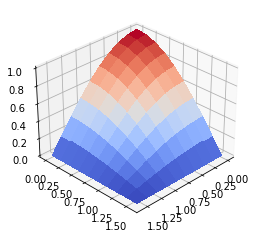

In [11]:
test = s[0]
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(x, y, test, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.view_init(30,45)
plt.draw()

<b>Метод Зейделя</b> в матричной форме:
\begin{equation*}
    (D+A_1)x^{j+1}+A_2x^j=f   
    \\
    (D+A_1)(x^{j+1}-x^j)+Ax^j=f
\end{equation*}
Где D- диагональная матрица, A_1- нижняя треугольная матрица, А_2- верхняя треугольная матрица
\alpha

Функция для метода Зейделя, где s - это трехмерная матрица решений, k - номер слоя в котором вычисляем значения , i и j - узлы разностной сетки 

In [12]:
def zeidel(L,n,s):
    h = (L)/(n-1)
    for i in range(n):
        s[1,i,0] = s[0,i,0]
    for j in range(n):
        s[1,0,j] = s[0,0,j]
    for i in range(1,n-1):
        for j in range(1,n-1):
            s[1,i,j] = (1/(AU*h*h + 4))*(s[1,i-1,j]+s[0,i+1,j]+s[1,i,j-1]+s[0,i,j+1])
    s[2] = s[0]
    s[0] = s[1]
    s[1] = np.zeros((n,n))
    return s

Создаю трехмерную матрицу, в которой будут сохранятся все вычисленные сетки при каждой новой итерации

In [13]:
v = np.zeros((3,n,n))
v[0]=e

In [14]:
eps = 1
m = 0
while eps>0.000000001:
    v = zeidel(L,n,v)
    m+=1
    eps = norma(L,n,v)
print(n,m,eps)

10 192 9.201311934603496e-10


Построение конечной сетки методом зейделя

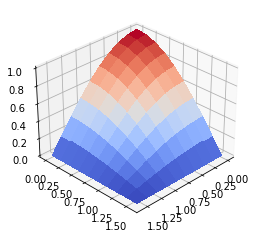

In [15]:
test = v[0]
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(x, y, test, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.view_init(30,45)
plt.draw()

Построение зависимости изменения нормы от номера итерации

<b>Метод Верхних релаксаций</b> Суть метода релаксации состоит в следующем. После вычисления очередной i-й компоненты (k+1)-го приближения по формуле метода зейделя производят дополнительное смещение этой компоненты следующим образом:
\begin{equation*}
    x^{k+1}_i=\tilde{x}^{k+1}_i+(\omega-1)(\tilde{x}^{k+1}_i-x^k_i)=\omega \tilde{x}^{k+1}_i + (1-\omega)x^k_i
\end{equation*}
где x^(k+1) с тильдой является решением методом зейделя
w>0 - заданный числовой параметр

In [16]:
def relax(L,n,s,w):
    h = (L)/(n-1)
    for i in range(n):
        s[1,i,0] = s[0,i,0]
    for j in range(n):
        s[1,0,j] = s[0,0,j]
    for i in range(1,n-1):
        for j in range(1,n-1):
            s[1,i,j] = (1/(AU*h*h + 4))*(s[1,i-1,j]+s[0,i+1,j]+s[1,i,j-1]+s[0,i,j+1])
            s[1,i,j] =  w*s[1,i,j] + (1-w)*(s[0,i,j])
    s[2] = s[0]
    s[0] = s[1]
    s[1] = np.zeros((n,n))
    return s

Создаю трехмерную матрицу, в которой будут сохранятся все вычисленные сетки при каждой новой итерации

In [17]:
c = np.zeros((3,n,n))
c[0]=e
print(len(c))

3


In [18]:
w = 1.1
eps = 1
m = 0
while eps>0.000000001:
    c = relax(L,n,v,w)
    m+=1
    eps = norma(L,n,v)
print(n,m,eps)

10 1 9.978979864655457e-10


Построение конечной сетки методом конечной релаксации

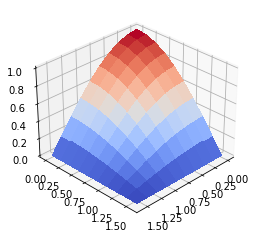

In [19]:
test = c[0]
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(x, y, test, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.view_init(30,45)
plt.draw()

Задание функций для расчета погрешностей для всех трех методов

In [20]:
def pogr_l(L,n):
    x, y, u = analit(L,n)
    e = generate(L,n)
    a = np.zeros((3,n,n))
    a[0]=e
    eps = 1
    m = 0
    it=0
    while eps>0.000000001:
        a = libman(L,n,a)
        eps = norma(L,n,a)
        m+=1
        it+=1
    z = max(map(max,abs(a[0]-u)))
    return a[0],m,z, it

In [31]:
w = 1.95
eps = 1
m = 0
while eps>0.000000001:
    c = relax(L,n,v,w)
    m+=1
    eps = norma(L,n,v)
print(n,m,eps)

10 1 5.455663698583635e-10


In [22]:
def pogr_z(L,n):
    x, y, u = analit(L,n)
    #print(len(u))
    e = generate(L,n)
    a = np.zeros((3,n,n))
    a[0]=e
    eps = 1
    m = 0
    it = 0
    while eps>0.000000001:
        a = zeidel(L,n,a)
        eps = norma(L,n,a)
        m+=1
        it+=1
    z = max(map(max,abs(a[0]-u)))
    return a[0],m,z, it

In [32]:
def pogr_r(L,n):
    x, y, u = analit(L,n)
    #print(len(u))
    e = generate(L,n)
    a = np.zeros((3,n,n))
    a[0]=e
    eps = 1
    m = 0
    it = 0
    w = 1.9
    while eps>0.000000001:
        a = relax(L,n,a,w)
        eps = norma(L,n,a)
        m+=1
        it+=1
    z = max(map(max,abs(a[0]-u)))
    return a[0],m,z, it

### Нахождение и построение графика погрешности численного решение в сравнении с аналитическим. 

In [39]:
list_pogr_l = []
list_pogr_z = []
list_pogr_r = []
list_it_l = []
list_it_z = []
list_it_r = []
for i in range(1,8):
    a_l,m_l,pogres_l,it_l = pogr_l(L,i*10)
    a_z,m_z,pogres_z,it_z = pogr_z(L,i*10)
    a_r,m_r,pogres_r,it_r = pogr_r(L,i*10)
    list_pogr_l.append(pogres_l)
    list_pogr_z.append(pogres_z)
    list_pogr_r.append(pogres_r)
    list_it_l.append(it_l)
    list_it_z.append(it_z)
    list_it_r.append(it_r)

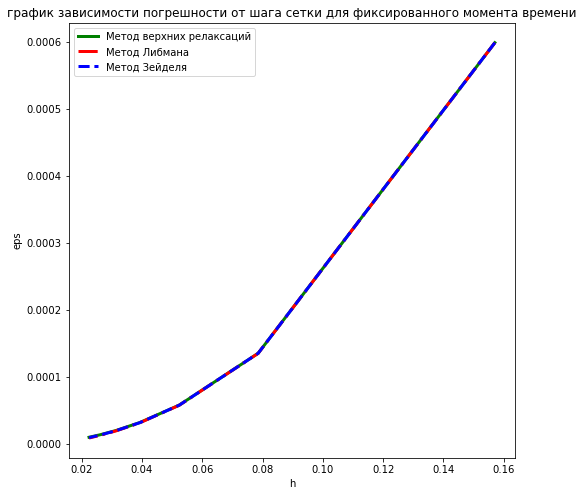

In [40]:
asd = [10,20,30,40,50,60,70]
plt.figure(figsize=(8, 8))
asd = list(map(lambda x: L/x , asd))
plt.plot(asd,list_pogr_r,'g', linestyle = '-',  linewidth = 3, label = 'Метод верхних релаксаций')
plt.plot(asd,list_pogr_l,'r', linestyle = '-.', linewidth = 3, label = 'Метод Либмана')
plt.plot(asd,list_pogr_z,'b', linestyle = '--', linewidth = 3, label = 'Метод Зейделя')
plt.ylabel('eps')
plt.xlabel('h')
plt.legend()
plt.title('график зависимости погрешности от шага сетки для фиксированного момента времени')
plt.show()

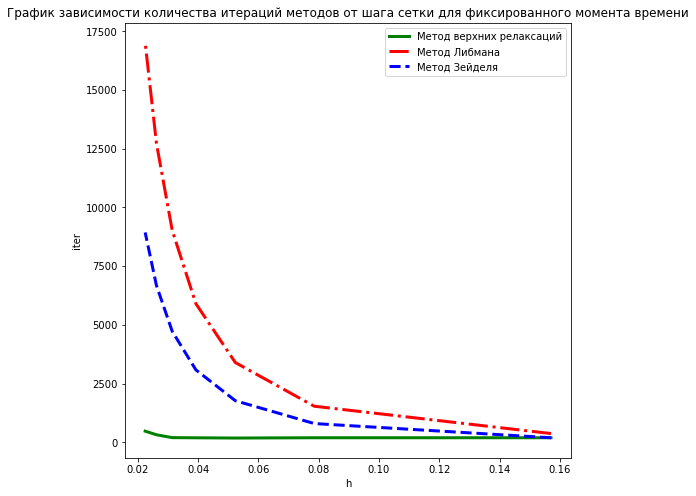

В методе верхних релаксаций на количество итераций намного меньше чем в остальных, оно падает с 500 до 200


In [43]:
plt.figure(figsize=(8, 8))
plt.plot(asd,list_it_r,'g', linestyle = '-',  linewidth = 3, label = 'Метод верхних релаксаций')
plt.plot(asd,list_it_l,'r', linestyle = '-.', linewidth = 3, label = 'Метод Либмана')
plt.plot(asd,list_it_z,'b', linestyle = '--', linewidth = 3, label = 'Метод Зейделя')
plt.ylabel('iter')
plt.xlabel('h')
plt.legend()
plt.title('График зависимости количества итераций методов от шага сетки для фиксированного момента времени')
plt.show()

print("В методе верхних релаксаций на количество итераций намного меньше чем в остальных, оно падает с 500 до 200")

In [42]:
list_it_r

[192, 192, 180, 190, 197, 319, 473]